Alumno: Erick Salvador Alvarez Valencia

## Demostrar la ortogonalidad de la transformada de Fourier para señales en 2D

Tenemos un conjunto de señales armónicas relacionadas entre sí en un periodo de $N$ muestras: $$S_{n, m} = \{S_{n, m}^0, S_{n, m}^1, ..., S_{n, m}^{N - 1}\}$$

Para verificar la ortogonalidad de esos componentes realizamos el producto punto con los vectores:

$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} S_{m, n}^{x, y} S_{k, l}^{x, y}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{-i2 \pi (\frac{nx}{N} + \frac{my}{M})} e^{i2 \pi (\frac{lx}{N} + \frac{kl}{M})}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{i2 \pi (-\frac{nx}{N} - \frac{my}{M} - \frac{xl}{N} - \frac{ky}{M})}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{x (l - n)}{N})} e^{i2 \pi (\frac{y (k - m)}{M})}$$
$$<\vec{S_{m, n}}, \vec{S_{k, l}}> = \sum_{x = 0}^{N - 1} e^{i2 \pi (\frac{x (l - n)}{N})} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{y (k - m)}{M})}$$

Hemos separado el producto anterior en un producto de sumas donde la primera depende sólo de $x$ y la segunda sólo de $y$. Ahora, tratamos estas sumas como series geométricas para ayudarnos a verificar la ortogonalidad.

$$\sum_{x = 0}^{N - 1} e^{i2 \pi (\frac{x (l - n)}{N})} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{y (k - m)}{M})} = \frac{1 - a^N}{1 - a} \frac{1 - a^M}{1 - a}$$
$$\frac{1 - a^N}{1 - a} \frac{1 - a^M}{1 - a} = \frac{1 - e^{\frac{i2 \pi (l - n) N}{N}}}{1 - e^{\frac{i2 \pi (l - n)}{N}}} \frac{1 - e^{\frac{i2 \pi (k - m) M}{M}}}{1 - e^{\frac{i2 \pi (k - m)}{M}}} = \frac{1 - e^{i2 \pi (l - n)}}{1 - e^{\frac{i2 \pi (l - n)}{N}}} \frac{1 - e^{i2 \pi (k - m)}}{1 - e^{\frac{i2 \pi (k - m)}{M}}}$$

Del producto anterior podemos ver que tanto $e^{i2 \pi (l - n)}$ como $e^{i2 \pi (k - m)}$ se convierten en 1 por la identidad de Euler, y por lo tanto todo el producto se convierte en cero.

Para el caso donde los pares (\{m, n\}) = (\{k, l\}) son iguales, vemos el producto interno definido anteriormente se convierte en la norma al cuadrado de dichos vectores.

$$<\vec{S_{m, n}}, \vec{S_{m, n}}> = ||\vec{S^{x, y}}||_2^2 = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} e^{i2 \pi (\frac{x (n - n)}{N})} e^{i2 \pi (\frac{y (m - m)}{M})} = MN$$

Ahora, una vez que hemos demostrado la ortogonalidad de los conjuntos anteriores podemos definir la transformada discreta de Fourier para encontrar los coeficientes:

$$C_{n, m} = \frac{<\vec{f}, \vec{S^{x, y}}>}{||\vec{S^{x, y}}||_2^2} = \frac{\sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} f(x, y) e^{-i2 \pi (\frac{nx}{N} + \frac{my}{M})}}{M N}$$

Definimos $\vec{C} = ((C_{0, 0}, C_{0, 1}, ..., (C_{0, N - 1}), C_{1, 0}, C_{1, 1}, C_{1, N - 1}), ..., (C_{M - 1, 0}, C_{M - 1, 1}, ..., C_{M - 1, N - 1}))$ como la matriz de coeficientes obtenidos con la transformada de Fourier.

De la misma forma podemos definir la transformada inversa de Fourier en dos dimensiones para el caso discreto como:
$$f(x, y) = \sum_{x = 0}^{N - 1} \sum_{y = 0}^{M - 1} C_{x, y} e^{i2 \pi (\frac{nx}{N} + \frac{my}{M})}$$

Ahora, se hará la programación de la transformada y la transformada inversa de Fourier para una imagen.

(32, 32)


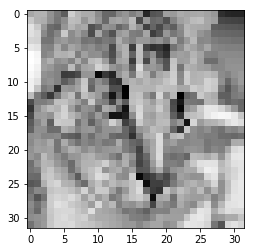

In [1]:
from math import *
import numpy as np
import skimage
from skimage import data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.transform import resize
from skimage.color import rgb2gray

%matplotlib inline
cat = data.chelsea()
cat = resize(cat, (32, 32), mode='reflect')
cat = rgb2gray(cat)
plt.imshow(cat, cmap = "gray")
print(cat.shape)

In [6]:
def coef(img, n, m):
    M = img.shape[0]
    N = img.shape[1]
    res = 0.0
    for y in range(M):
        for x in range(N):
            res += img[y][x] * np.exp(-2j * np.pi * ((float(n * x) / float(N)) + (float(m * y) / float(M))))
            
    res /= float(M * N)
    return res

def compute_coef(img, n, m, do_plot = True):
    res = np.zeros((n + 1, m + 1), dtype = 'float')
    for ni in range(n):
        for mj in range(m):
            res[ni][mj] = coef(img, ni, mj)
    
    if not do_plot:
        return res
    
    M = img.shape[0]
    N = img.shape[1]
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            img_aux = np.zeros(img.shape, dtype = 'float')
            c = res[i][j]
            
            for y in range(M):
                for x in range(N):
                    img_aux[y][x] += c * np.exp(2j * np.pi * ((float(i * x) / float(N)) + (float(j * y) / float(M))))
            
            plt.imshow(img_aux, cmap = "gray")
            plt.show()
            
    return res

def inverse_transform(c_coef, n, m, M, N):
    res = np.zeros((M, N), dtype = 'float')
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            img_aux = np.zeros((M, N), dtype = 'float')
            c = c_coef[i][j]
            
            for y in range(M):
                for x in range(N):
                    img_aux[y][x] += c * np.exp(2j * np.pi * ((float(i * x) / float(N)) + (float(j * y) / float(M))))
                    
            res += img_aux
            
    return res

c_coef = compute_coef(cat, 32, 32, False)
print(c_coef)

/home/e-082017-04/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


[[ 0.46019839  0.00453251 -0.00621069 ..., -0.00621069  0.00453251  0.        ]
 [ 0.01804593  0.00627451 -0.00520855 ..., -0.00334076 -0.00173642  0.        ]
 [-0.00928098 -0.01504823 -0.00297526 ..., -0.00335746  0.00224628  0.        ]
 ..., 
 [-0.00928098  0.00224628 -0.00335746 ..., -0.00297526 -0.01504823  0.        ]
 [ 0.01804593 -0.00173642 -0.00334076 ..., -0.00520855  0.00627451  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [5]:
reconstructed_img = inverse_transform(c_coef, 32, 32, cat.shape[0], cat.shape[1])
plt.imshow(reconstructed_img, cmap = "gray")

/home/e-082017-04/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: ComplexWarning: Casting complex values to real discards the imaginary part


IndexError: index 32 is out of bounds for axis 0 with size 32